# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('autos.csv', index_col='index')
data.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [3]:
data.columns
data.shape

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

(371528, 20)

In [4]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

4

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371524 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371524 non-null  object
 1   name                 371524 non-null  object
 2   seller               371524 non-null  object
 3   offerType            371524 non-null  object
 4   price                371524 non-null  int64 
 5   abtest               371524 non-null  object
 6   vehicleType          333655 non-null  object
 7   yearOfRegistration   371524 non-null  int64 
 8   gearbox              351315 non-null  object
 9   powerPS              371524 non-null  int64 
 10  model                351040 non-null  object
 11  kilometer            371524 non-null  int64 
 12  monthOfRegistration  371524 non-null  int64 
 13  fuelType             338138 non-null  object
 14  brand                371524 non-null  object
 15  notRepairedDamage    299464 non-null  o

In [6]:
# Missing data percent
np.round(data.isna().sum().sort_values(ascending=False)/data.shape[0]*100, 2)

notRepairedDamage      19.40
vehicleType            10.19
fuelType                8.99
model                   5.51
gearbox                 5.44
kilometer               0.00
postalCode              0.00
nrOfPictures            0.00
dateCreated             0.00
brand                   0.00
monthOfRegistration     0.00
dateCrawled             0.00
name                    0.00
powerPS                 0.00
yearOfRegistration      0.00
abtest                  0.00
price                   0.00
offerType               0.00
seller                  0.00
lastSeen                0.00
dtype: float64

In [7]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715240e+05,371524.000000,371524.000000,371524.000000,371524.000000,371524.0,371524.00000
mean,1.729530e+04,2004.578033,115.549039,125618.842928,5.734451,0.0,50820.49427
std,3.587973e+06,92.867097,192.140488,40112.138811,3.712423,0.0,25799.08841
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
numeric = data.select_dtypes(np.number).columns

In [9]:
data[numeric].corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652
powerPS,0.006850,0.000351,1.000000,-0.010735,0.044357,NaN,0.027111
kilometer,-0.000635,-0.055319,-0.010735,1.000000,0.001842,NaN,-0.026684
monthOfRegistration,-0.002826,-0.011607,0.044357,0.001842,1.000000,NaN,0.014964
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001652,0.027111,-0.026684,0.014964,NaN,1.000000


# 2. Data preprocessing

select the model name from the name column

In [10]:
import re

In [11]:
unique_models = set(data.model)

In [12]:
def clean_text(text):
    # Remove punctuation, numbers, and convert to lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = text.lower()
    words = text.split()
    names = [name for name in words if name in unique_models]
    res = names[0] if len(names)>0 else np.nan
    return res

In [13]:
data['clean_name'] = data['name'].apply(clean_text)

In [14]:
data[data['model'].isna()][['brand', 'model', 'name', 'clean_name']]

,brand,model,name,clean_name
index,,,,
1,audi,NaN,A5_Sportback_2.7_Tdi,a5
60,sonstige_autos,NaN,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,NaN
83,fiat,NaN,Bastler_Fahrzeug_mit_Rest_Tuev,NaN
119,volkswagen,NaN,Polo_6n_Karosse_zu_verschenken,polo
139,audi,NaN,Audi_80_5_Zylinder_b4_liebhaberfahrzeug,80
...,...,...,...,...
371399,fiat,NaN,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,stilo
371476,sonstige_autos,NaN,ALPINA_D3_Touring,NaN
371495,opel,NaN,Opel_Tigra,tigra


In [15]:
# before name processing
data.model.isna().sum()

20484

In [16]:
indices = data[data['model'].isna()].index
data.loc[indices, 'model'] = data.loc[indices, 'clean_name']
# after name processing
data.model.isna().sum()
data.drop('clean_name', axis=1, inplace=True)

11087

In [17]:
data['name'].nunique()
data.drop('name', axis=1, inplace=True)

233531

#### Drop useless columns

In [18]:
data['seller'].value_counts()
# deleting them because of very unbalanced categories.
data.drop('seller', axis=1, inplace=True)

seller
privat        371521
gewerblich         3
Name: count, dtype: int64

In [19]:
data['offerType'].value_counts()
# deleting them because of very unbalanced categories.
data.drop('offerType', axis=1, inplace=True)

offerType
Angebot    371512
Gesuch         12
Name: count, dtype: int64

In [20]:
data.drop(['dateCrawled', 'dateCreated', 'lastSeen'], axis=1, inplace=True)
# removing uninformative features with dates

In [21]:
data.drop('nrOfPictures', axis=1, inplace=True)
# empty column

In [22]:
data.drop('postalCode', axis=1, inplace=True)
# removing uninformative feature

#### Handling missing data

In [23]:
data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
index,,,,,,,,,,,,
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,a5,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [24]:
# Missing data percent
np.round(data.isna().sum().sort_values(ascending=False)/data.shape[0]*100, 2)

notRepairedDamage      19.40
vehicleType            10.19
fuelType                8.99
gearbox                 5.44
model                   2.98
price                   0.00
abtest                  0.00
yearOfRegistration      0.00
powerPS                 0.00
kilometer               0.00
monthOfRegistration     0.00
brand                   0.00
dtype: float64

In [25]:
data['notRepairedDamage'].value_counts()
data['notRepairedDamage'].isna().sum()
data['notRepairedDamage'].fillna('unknown', inplace=True)

notRepairedDamage
nein    263179
ja       36285
Name: count, dtype: int64

72060

/tmp/ipykernel_9700/304619637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['notRepairedDamage'].fillna('unknown', inplace=True)


In [26]:
data['vehicleType'].value_counts()
data['vehicleType'].isna().sum()
data['vehicleType'].fillna('unknown', inplace=True)

vehicleType
limousine     95894
kleinwagen    80022
kombi         67563
bus           30201
cabrio        22898
coupe         19013
suv           14707
andere         3357
Name: count, dtype: int64

37869

/tmp/ipykernel_9700/189410050.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['vehicleType'].fillna('unknown', inplace=True)


In [27]:
data['fuelType'].value_counts()
data['fuelType'].isna().sum()
data['fuelType'].fillna('unknown', inplace=True)
data['fuelType'] = data['fuelType'].replace(['cng', 'hybrid', 'elektro'], 'andere')
data['fuelType'].value_counts()

fuelType
benzin     223854
diesel     107745
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: count, dtype: int64

33386

/tmp/ipykernel_9700/1470592756.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuelType'].fillna('unknown', inplace=True)


fuelType
benzin     223854
diesel     107745
unknown     33386
lpg          5378
andere       1161
Name: count, dtype: int64

In [28]:
data['gearbox'].value_counts()
data['gearbox'].isna().sum()
data['gearbox'].fillna('unknown', inplace=True)

gearbox
manuell      274212
automatik     77103
Name: count, dtype: int64

20209

/tmp/ipykernel_9700/1153494715.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gearbox'].fillna('unknown', inplace=True)


In [29]:
data['model'].isna().sum()
data['model'].fillna('unknown', inplace=True)

11087

/tmp/ipykernel_9700/813511973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['model'].fillna('unknown', inplace=True)


#### Numeric columns

In [30]:
numeric = data.select_dtypes(np.number).columns
data[numeric].head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
index,,,,,
0,480,1993,0,150000,0
1,18300,2011,190,125000,5
2,9800,2004,163,125000,8
3,1500,2001,75,150000,6
4,3600,2008,69,90000,7


<Figure size 500x300 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for price')

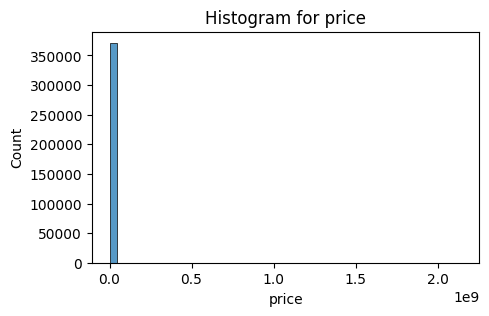

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='yearOfRegistration', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for yearOfRegistration')

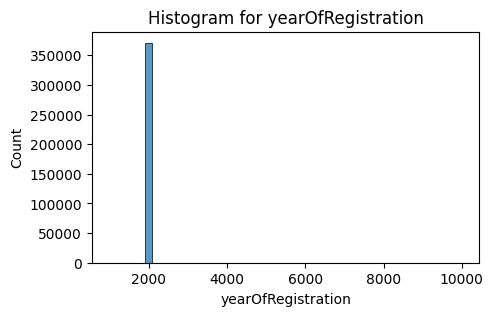

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='powerPS', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for powerPS')

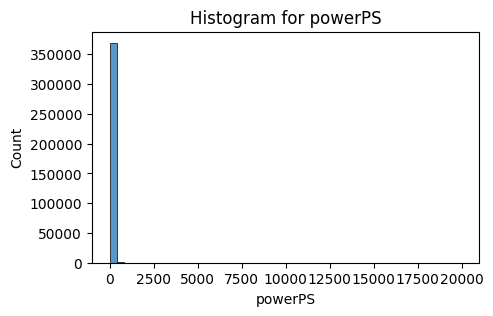

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='kilometer', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for kilometer')

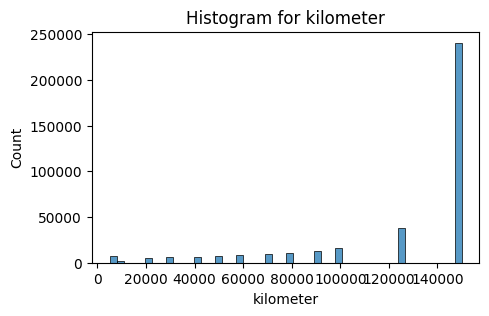

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='monthOfRegistration', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for monthOfRegistration')

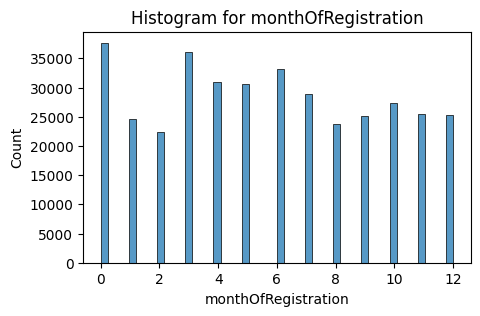

In [31]:
for x in numeric:
    plt.figure(figsize=(5,3))
    sns.histplot(data=data, x=x, bins=50)
    plt.title(f'Histogram for {x}')  # Optional: Add titles for each plot
    plt.show()  # Show each plot

#### Deleting outliers

In [32]:
data['price'].quantile([0, 0.01, 0.03, 0.05, 0.1, 0.9, 0.95, 0.97, 0.99, 1])

0.00    0.000000e+00
0.01    0.000000e+00
0.03    1.000000e+00
0.05    2.000000e+02
0.10    5.000000e+02
0.90    1.400000e+04
0.95    1.979000e+04
0.97    2.450000e+04
0.99    3.600000e+04
1.00    2.147484e+09
Name: price, dtype: float64

In [33]:
q1 = data['price'].quantile(0.05)
q2 = data['price'].quantile(0.99)
data = data[data['price'] > q1]
data = data[data['price'] < q2]

In [34]:
data['yearOfRegistration'].quantile([0, 0.01, 0.03, 0.05, 0.1, 0.9, 0.95, 0.97, 0.99, 1])

0.00    1000.0
0.01    1980.0
0.03    1990.0
0.05    1993.0
0.10    1996.0
0.90    2012.0
0.95    2016.0
0.97    2017.0
0.99    2018.0
1.00    9999.0
Name: yearOfRegistration, dtype: float64

In [35]:
q1 = data['yearOfRegistration'].quantile(0.01)
q2 = data['yearOfRegistration'].quantile(0.99)
data = data[data['yearOfRegistration'] > q1]
data = data[data['yearOfRegistration'] < q2]

In [36]:
data['powerPS'].quantile([0, 0.01, 0.03, 0.05, 0.1, 0.9, 0.95, 0.97, 0.99, 1])

0.00        0.0
0.01        0.0
0.03        0.0
0.05        0.0
0.10       45.0
0.90      193.0
0.95      231.0
0.97      250.0
0.99      320.0
1.00    20000.0
Name: powerPS, dtype: float64

In [37]:
q1 = data['powerPS'].quantile(0.1)
q2 = data['powerPS'].quantile(0.99)
data = data[data['powerPS'] > q1]
data = data[data['powerPS'] < q2]

<Axes: xlabel='kilometer', ylabel='price'>

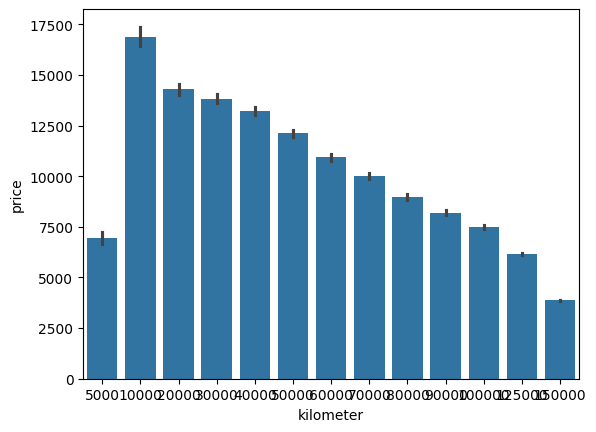

In [38]:
sns.barplot(data=data, x='kilometer', y='price')

In [39]:
data['kilometer'].quantile([0, 0.01, 0.03, 0.05, 0.1, 0.9, 0.95, 0.97, 0.99, 1])

0.00      5000.0
0.01     10000.0
0.03     30000.0
0.05     40000.0
0.10     60000.0
0.90    150000.0
0.95    150000.0
0.97    150000.0
0.99    150000.0
1.00    150000.0
Name: kilometer, dtype: float64

In [40]:
data = data[data['kilometer'] > 10000]

In [41]:
data.reset_index(drop=True)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,18300,test,coupe,2011,manuell,190,a5,125000,5,diesel,audi,ja
1,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown
2,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
3,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
4,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
...,...,...,...,...,...,...,...,...,...,...,...,...
297294,5250,control,unknown,2016,automatik,150,159,150000,12,unknown,alfa_romeo,nein
297295,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
297296,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
297297,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


<Figure size 500x300 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for price')

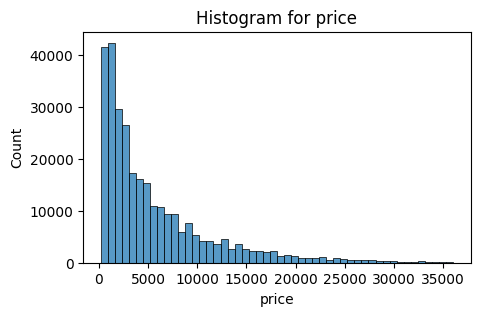

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='yearOfRegistration', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for yearOfRegistration')

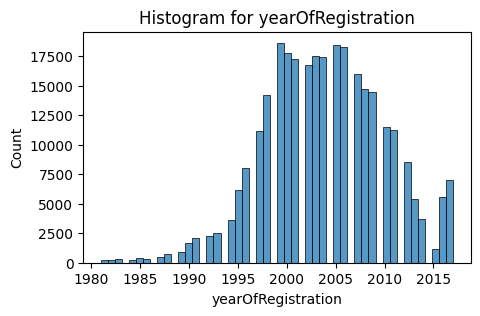

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='powerPS', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for powerPS')

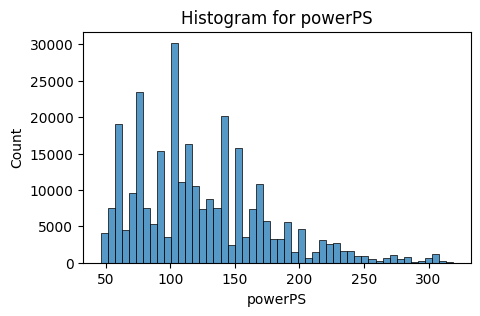

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='kilometer', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for kilometer')

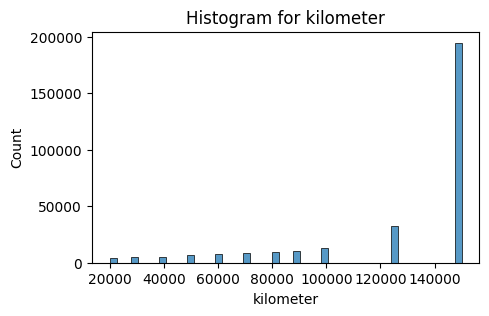

<Figure size 500x300 with 0 Axes>

<Axes: xlabel='monthOfRegistration', ylabel='Count'>

Text(0.5, 1.0, 'Histogram for monthOfRegistration')

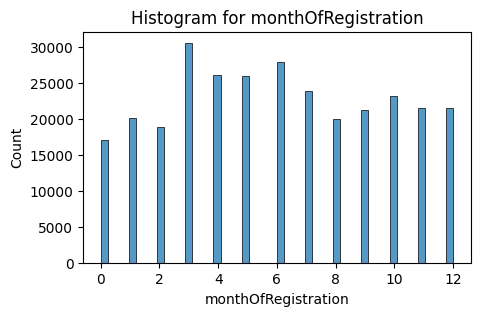

In [42]:
numeric = data.select_dtypes(np.number).columns

for x in numeric:
    plt.figure(figsize=(5,3))
    sns.histplot(data=data, x=x, bins=50)
    plt.title(f'Histogram for {x}')  # Optional: Add titles for each plot
    plt.show()  # Show each plot

#### Other data manipulations

In [43]:
data['yearOfRegistration'] = data['yearOfRegistration'] + data['monthOfRegistration']/12
data.drop('monthOfRegistration', axis=1, inplace=True)

In [44]:
data.reset_index(drop=True, inplace=True)

<Axes: xlabel='powerPS', ylabel='price'>

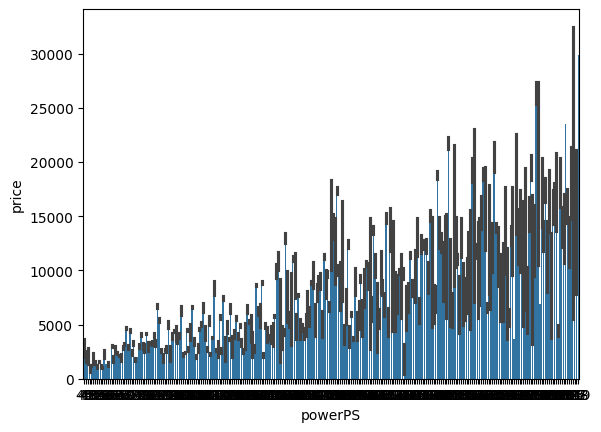

In [45]:
sns.barplot(data=data, x='powerPS', y='price')

#### getting ready

In [46]:
X = data.drop('price', axis=1)
y = data['price']

In [47]:
df_metrics = pd.DataFrame(columns=['r2', 'mse', 'rmse', 'mae'])

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=56)

# 1. Linear model

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [51]:
numeric = X_train.select_dtypes(np.number).columns
categorical = X_train.select_dtypes(exclude=np.number).columns

linear_column_transformer = ColumnTransformer([
    ('kbins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'), ['yearOfRegistration']),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe', linear_column_transformer),
    ('regression', Ridge())
])

In [52]:
# search grid
param_grid = {
    'regression__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
    }

# creating GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                   # fold number for cv
    scoring='r2',           # optimization metric
    n_jobs=-1,              # use all cpu cores
    verbose=0             
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        ColumnTransformer(transformers=[('kbins',
                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                          n_bins=10),
                                                                         ['yearOfRegistration']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         Index(['yearOfRegistration', 'powerPS', 'kilometer'], dtype='object'))])),
                                       ('regression', Ridge())]),
             n_jobs=-1,
             param_grid={'regression__alpha': [0.001, 0.005, 0.01, 0.05, 0.1,
                                               0.5, 1.0, 5.0, 10.0]},
             scoring='r2')

In [53]:
print("best params:", grid_search.best_params_)
print("best r2 score on cv:", grid_search.best_score_)

y_pred = grid_search.predict(X_valid)

print('validation sample results:')
df_metrics.loc['Linear Model'] = np.round([
    r2_score(y_valid, y_pred),
    mean_squared_error(y_valid, y_pred),
    np.sqrt(mean_squared_error(y_valid, y_pred)),
    mean_absolute_error(y_valid, y_pred)
],2)

df_metrics.loc[['Linear Model']]
best_model = grid_search.best_estimator_

best params: {'regression__alpha': 1.0}
best r2 score on cv: 0.7640881330729461
validation sample results:


,r2,mse,rmse,mae
Linear Model,0.76,8333819.49,2886.84,2012.5


# 2. Decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [55]:
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=25, min_samples_split=100, random_state=56)
encoder = OneHotEncoder(handle_unknown='ignore')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scale', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', regressor)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

print('validation sample results:')
df_metrics.loc['Decision tree'] = np.round([
    r2_score(y_valid, y_pred),
    mean_squared_error(y_valid, y_pred),
    np.sqrt(mean_squared_error(y_valid, y_pred)),
    mean_absolute_error(y_valid, y_pred)
],2)

df_metrics.loc[['Decision tree']]

Pipeline(steps=[('ohe',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['yearOfRegistration', 'powerPS', 'kilometer'], dtype='object'))])),
                ('regression',
                 DecisionTreeRegressor(max_depth=25, min_samples_split=100,
                                       random_state=56))])

validation sample results:


,r2,mse,rmse,mae
Decision tree,0.88,4247081.03,2060.84,1211.88


# 3. KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)

encoder = OneHotEncoder(handle_unknown='ignore')

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scale', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', regressor)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)

print('validation sample results:')
df_metrics.loc['KNN'] = np.round([
    r2_score(y_valid, y_pred),
    mean_squared_error(y_valid, y_pred),
    np.sqrt(mean_squared_error(y_valid, y_pred)),
    mean_absolute_error(y_valid, y_pred)
], 2)

df_metrics.loc[['KNN']]

Pipeline(steps=[('ohe',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['yearOfRegistration', 'powerPS', 'kilometer'], dtype='object'))])),
                ('regression', KNeighborsRegressor(n_jobs=-1, n_neighbors=4))])

validation sample results:


,r2,mse,rmse,mae
KNN,0.88,4375646.67,2091.8,1227.32


# 4. Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    criterion='squared_error',
    random_state=56,
    n_estimators=50,
    n_jobs=-1 
)

encoder = OneHotEncoder(handle_unknown='ignore')
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scale', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', regressor)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

print('validation sample results:')
df_metrics.loc['Random Forest'] = np.round([
    r2_score(y_valid, y_pred),
    mean_squared_error(y_valid, y_pred),
    np.sqrt(mean_squared_error(y_valid, y_pred)),
    mean_absolute_error(y_valid, y_pred)
],2)

df_metrics.loc[['Random Forest']]

Pipeline(steps=[('ohe',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['yearOfRegistration', 'powerPS', 'kilometer'], dtype='object'))])),
                ('regression',
                 RandomForestRegressor(n_estimators=50, n_jobs=-1,
                                       random_state=56))])

validation sample results:


,r2,mse,rmse,mae
Random Forest,0.91,3196662.75,1787.92,1032.47


# 5. XGBoost  

In [58]:
from xgboost import XGBRegressor
regressor = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.3,
    random_state=56
)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scale', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', regressor)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

df_metrics.loc['XGBoost'] = np.round([
    r2_score(y_valid, y_pred),
    mean_squared_error(y_valid, y_pred),
    np.sqrt(mean_squared_error(y_valid, y_pred)),
    mean_absolute_error(y_valid, y_pred)
],2)

df_metrics.loc[['XGBoost']]

Pipeline(steps=[('ohe',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['yearOfRegistration', 'powerPS', 'kilometer'], dtype='object'))])),
                ('regression',
                 XGBRegressor(base_score=None, boos...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=56, ...))])

,r2,mse,rmse,mae
XGBoost,0.92,2947483.25,1716.82,1021.09


# 6. CatBoost

In [61]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(
    cat_features=categorical.tolist(),  
    iterations=500,
    early_stopping_rounds=50,
    thread_count=-1,
    random_state=56,
    verbose=100
)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_valid)

df_metrics.loc['CatBoost'] = np.round([
    r2_score(y_valid, y_pred),
    mean_squared_error(y_valid, y_pred),
    np.sqrt(mean_squared_error(y_valid, y_pred)),
    mean_absolute_error(y_valid, y_pred)
],2)

df_metrics.loc[['CatBoost']]

Learning rate set to 0.170754
0:	learn: 5243.8563522	total: 56ms	remaining: 28s
100:	learn: 1966.3871565	total: 4.72s	remaining: 18.6s
200:	learn: 1877.3714537	total: 9.38s	remaining: 13.9s
300:	learn: 1829.0171069	total: 14.1s	remaining: 9.31s
400:	learn: 1795.1297061	total: 19.1s	remaining: 4.72s
499:	learn: 1767.1475896	total: 24s	remaining: 0us


,r2,mse,rmse,mae
CatBoost,0.91,3294868.23,1815.18,1094.4


# 7. Results

In [62]:
df_metrics.sort_values(by='r2')

,r2,mse,rmse,mae
Linear Model,0.76,8333819.49,2886.84,2012.50
Decision tree,0.88,4247081.03,2060.84,1211.88
KNN,0.88,4375646.67,2091.80,1227.32
Random Forest,0.91,3196662.75,1787.92,1032.47
CatBoost,0.91,3294868.23,1815.18,1094.40
XGBoost,0.92,2947483.25,1716.82,1021.09
